## 1. Focus on the stock you pick and their competitors. Report summary statistics of the training period you select and plot the kernel density.

In [ ]:
!pip install wget
!pip install getFamaFrenchFactors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=f1d470134ad42ec940d3849898f8c7b74013db97e856baf4d3414020e549a457
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
yf.pdr_override()

# The tech stocks we'll use for this analysis
com_list = ['GS','JPM', 'MS', 'C', 'BAC', 'BCS']

# Set up End and Start times for data grab
start = '2018-04-01'
end= '2023-04-01'

for stock in com_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [GS, JPM, MS, C, BAC, BCS]
company_name = ["Goldman Sach", "JPMorgan Chase", "Morgan Stanley", "Citigroup", "Bank of America", "Barclays"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-04-02,251.259995,252.600006,243.770004,247.350006,220.866379,3429900,Goldman Sach
2018-04-03,248.610001,250.889999,245.899994,250.580002,223.750488,2488200,Goldman Sach
2018-04-04,245.710007,253.220001,244.509995,252.619995,225.572113,2853200,Goldman Sach
2018-04-05,254.500000,258.000000,253.399994,255.809998,228.420547,1924800,Goldman Sach
2018-04-06,251.479996,255.339996,246.679993,249.970001,223.205841,3621900,Goldman Sach
...,...,...,...,...,...,...,...
2023-03-27,6.740000,6.810000,6.700000,6.750000,6.750000,12985600,Barclays
2023-03-28,6.700000,6.780000,6.670000,6.720000,6.720000,7978500,Barclays
2023-03-29,6.930000,6.990000,6.900000,6.960000,6.960000,11205800,Barclays


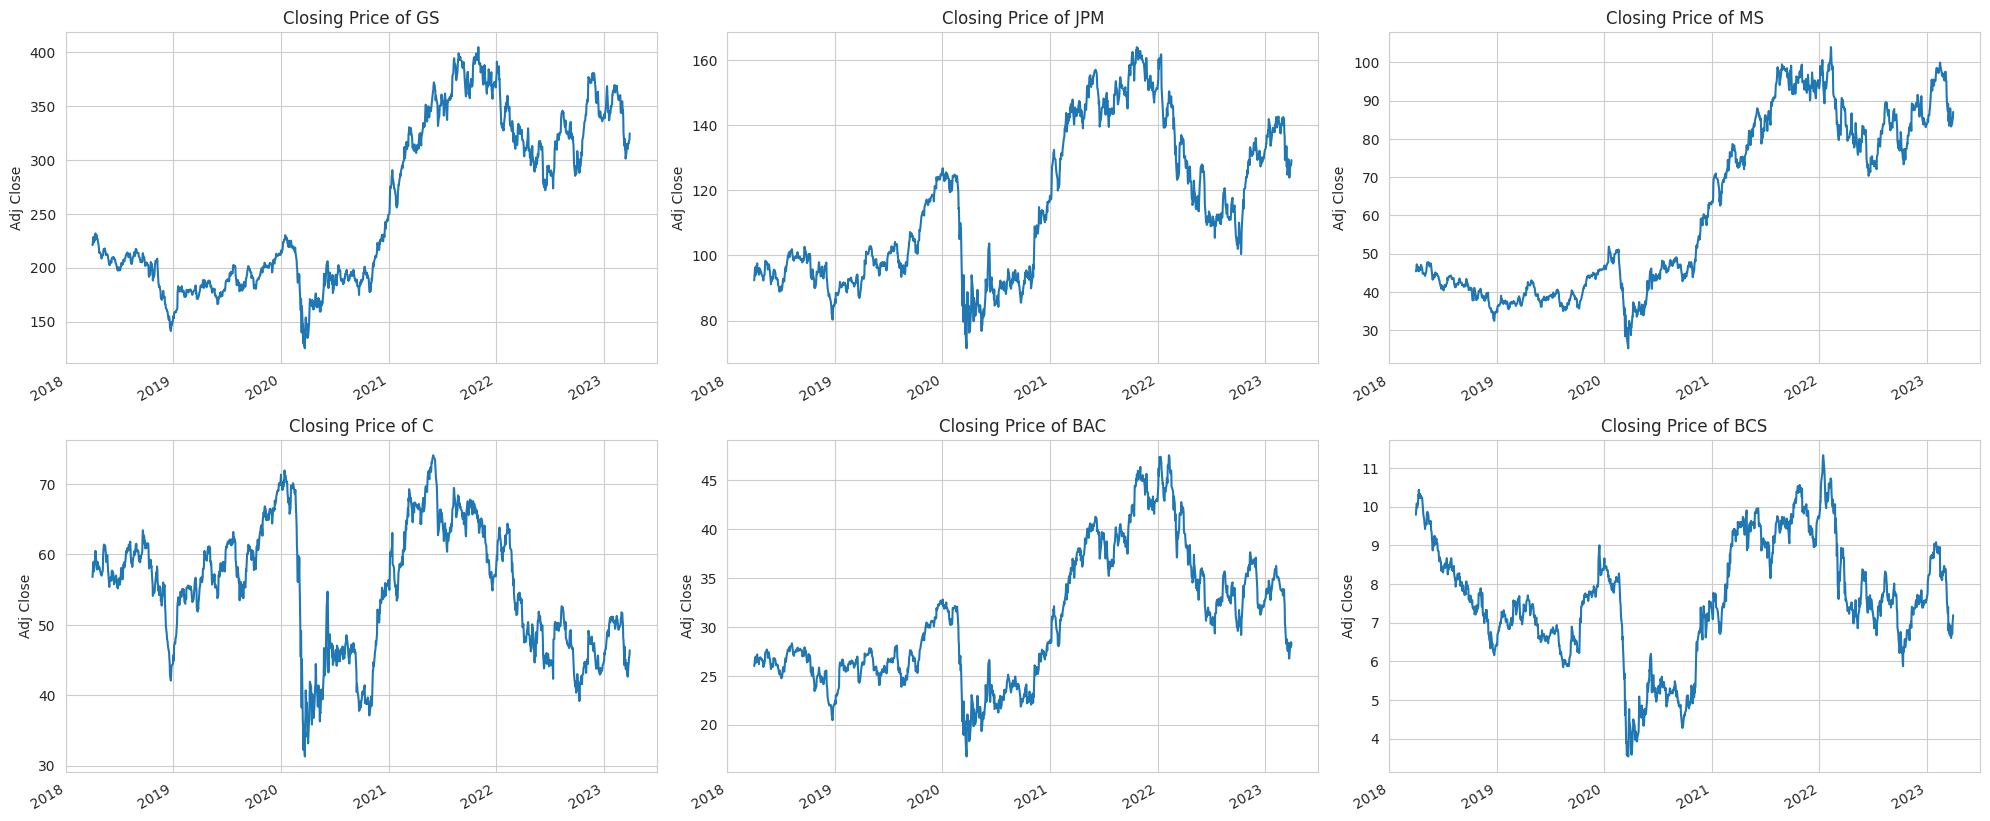

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(20, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {com_list[i - 1]}")

plt.tight_layout()

[*********************100%***********************]  6 of 6 completed
         Mean  Standard Deviation  Skewness   Kurtosis
BAC  0.000323            0.022444  0.416149  10.570692
BCS  0.000201            0.026226 -0.039098   9.317170
C    0.000147            0.024598  0.062252  11.539080
GS   0.000590            0.020786  0.190590   9.966625
JPM  0.000515            0.020313  0.408446  12.636651
MS   0.000805            0.022299  0.583129  13.705329


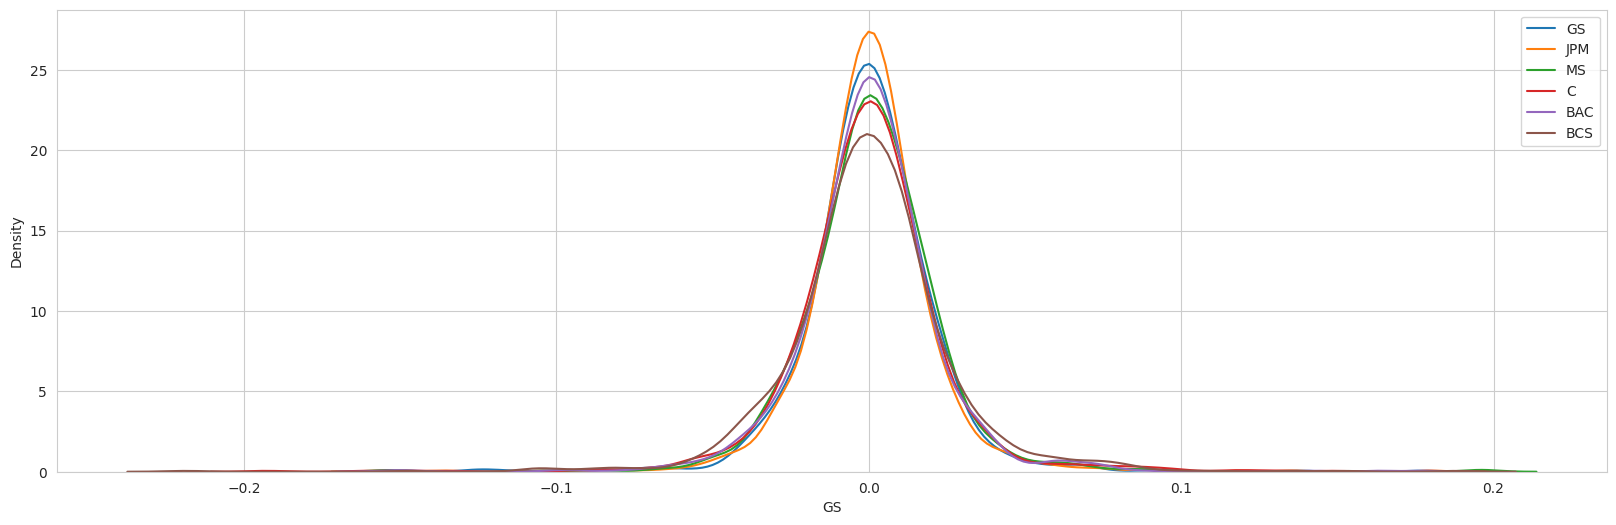

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the tickers of the stocks to analyze
tickers = ['GS','JPM', 'MS', 'C', 'BAC', 'BCS']

# Set the start and end dates for the training period
start_date = '2018-04-01'
end_date = '2023-04-01'

# Download the historical prices for each stock
prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Compute the daily returns for each stock
returns = prices.pct_change().dropna()

# Compute the summary statistics for each stock
summary_stats = pd.concat([returns.mean(), returns.std(), returns.skew(), returns.kurtosis()], axis=1)
summary_stats.columns = ['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis']
print(summary_stats)

# Plot the kernel density for each stock
plt.rcParams['figure.figsize'] = (20,6)

sns.kdeplot(returns['GS'], label='GS')
sns.kdeplot(returns['JPM'], label='JPM')
sns.kdeplot(returns['MS'], label='MS')
sns.kdeplot(returns['C'], label='C')
sns.kdeplot(returns['BAC'], label='BAC')
sns.kdeplot(returns['BCS'], label='BCS')
plt.legend()

## 2. Please use the features/factors you  take and discovered (e.g. FRED, Fama-French website, ADS, AR, CAPM, momentum factors, volume, price/return lags, etc.) to construct a feature database. The target variable Y can be either price or return. Frequency could be either daily or monthly.    

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
# The historical stock data for Goldman Chase
df = yf.download('GS')
df.reset_index(inplace=True)

# filter the data for the time period
start_date = '2019-01-02'
end_date = '2023-03-31'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

[*********************100%***********************]  1 of 1 completed


In [84]:
# calculate the OBV values
df['OBV'] = np.where(df['Close'] > df['Close'].shift(1), df['Volume'],
                     np.where(df['Close'] < df['Close'].shift(1), -df['Volume'], 0)).cumsum()

# create the lagged variables
df['Prev Open'] = df['Open'].shift(1)
df['Prev OBV'] = df['OBV'].shift(1)

df.drop(['OBV'],axis=1,inplace=True)

# drop NaN values
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Open,Prev OBV
4950,2019-01-04,172.990005,176.000000,171.100006,175.050003,158.016983,3788300,170.660004,0.0
4951,2019-01-07,175.229996,177.830002,172.270004,176.020004,158.892609,3152100,172.990005,3788300.0
4952,2019-01-08,177.779999,178.100006,172.899994,175.369995,158.305893,2692700,175.229996,6940400.0
4953,2019-01-09,176.100006,177.690002,174.910004,176.470001,159.298843,3321400,177.779999,4247700.0
4954,2019-01-10,175.660004,178.070007,175.500000,176.000000,158.874573,2808700,176.100006,7569100.0
...,...,...,...,...,...,...,...,...,...
6013,2023-03-27,318.619995,320.899994,317.170013,318.529999,316.122955,2300600,310.149994,72051800.0
6014,2023-03-28,319.089996,320.609985,316.119995,318.440002,316.033630,1224300,318.619995,74352400.0
6015,2023-03-29,322.500000,322.709991,318.679993,320.720001,318.296417,1475900,319.089996,73128100.0
6016,2023-03-30,324.559998,324.869995,319.880005,321.140015,318.713257,1456300,322.500000,74604000.0


In [85]:
!pip install fredapi
from fredapi import Fred
import pandas as pd
fred = Fred(api_key ='63c81735d3c3a4a16c8073b4fdaa61a1')
unrate = fred.get_series('UNRATE', observation_start='2019-01-02', observation_end='2023-03-31' )
df1 = pd.DataFrame({'Date': unrate.index, 'Unemployment Rate': unrate.values})

# Set the date as the index
df1.set_index('Date', inplace=True)

# Use the resample method to convert the data from monthly to daily
df1 = df1.resample('D').ffill()
df2= pd.merge(df, df1, on="Date")
df2

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Open,Prev OBV,Unemployment Rate
0,2019-01-04,172.990005,176.000000,171.100006,175.050003,158.016983,3788300,170.660004,0.0,4.0
1,2019-01-07,175.229996,177.830002,172.270004,176.020004,158.892609,3152100,172.990005,3788300.0,4.0
2,2019-01-08,177.779999,178.100006,172.899994,175.369995,158.305893,2692700,175.229996,6940400.0,4.0
3,2019-01-09,176.100006,177.690002,174.910004,176.470001,159.298843,3321400,177.779999,4247700.0,4.0
4,2019-01-10,175.660004,178.070007,175.500000,176.000000,158.874573,2808700,176.100006,7569100.0,4.0
...,...,...,...,...,...,...,...,...,...,...
1041,2023-02-23,363.200012,367.880005,359.609985,363.540009,358.227844,1931400,361.630005,82284800.0,3.6
1042,2023-02-24,360.170013,365.179993,359.529999,363.850006,358.533295,2428600,363.200012,84216200.0,3.6
1043,2023-02-27,368.220001,370.299988,364.510010,365.529999,360.188751,2842400,360.170013,86644800.0,3.6
1044,2023-02-28,366.000000,366.010010,351.329987,351.649994,346.511566,4945600,368.220001,89487200.0,3.6


In [86]:
cpia = fred.get_series('CPIAUCSL', observation_start='2019-01-02', observation_end='2023-03-31' )
df3 = pd.DataFrame({'Date': cpia.index, 'Consumer Price Index': cpia.values})

# Set the date as the index
df3.set_index('Date', inplace=True)

# Use the resample method to convert the data from monthly to daily
df3 = df3.resample('D').ffill()

df4= pd.merge(df2, df3, on="Date")
df4

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Open,Prev OBV,Unemployment Rate,Consumer Price Index
0,2019-01-04,172.990005,176.000000,171.100006,175.050003,158.016983,3788300,170.660004,0.0,4.0,252.718
1,2019-01-07,175.229996,177.830002,172.270004,176.020004,158.892609,3152100,172.990005,3788300.0,4.0,252.718
2,2019-01-08,177.779999,178.100006,172.899994,175.369995,158.305893,2692700,175.229996,6940400.0,4.0,252.718
3,2019-01-09,176.100006,177.690002,174.910004,176.470001,159.298843,3321400,177.779999,4247700.0,4.0,252.718
4,2019-01-10,175.660004,178.070007,175.500000,176.000000,158.874573,2808700,176.100006,7569100.0,4.0,252.718
...,...,...,...,...,...,...,...,...,...,...,...
1041,2023-02-23,363.200012,367.880005,359.609985,363.540009,358.227844,1931400,361.630005,82284800.0,3.6,301.648
1042,2023-02-24,360.170013,365.179993,359.529999,363.850006,358.533295,2428600,363.200012,84216200.0,3.6,301.648
1043,2023-02-27,368.220001,370.299988,364.510010,365.529999,360.188751,2842400,360.170013,86644800.0,3.6,301.648
1044,2023-02-28,366.000000,366.010010,351.329987,351.649994,346.511566,4945600,368.220001,89487200.0,3.6,301.648


In [66]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1047 non-null   datetime64[ns]
 1   Open                  1047 non-null   float64       
 2   High                  1047 non-null   float64       
 3   Low                   1047 non-null   float64       
 4   Close                 1047 non-null   float64       
 5   Adj Close             1047 non-null   float64       
 6   Volume                1047 non-null   int64         
 7   Prev Open             1047 non-null   float64       
 8   Prev OBV              1047 non-null   float64       
 9   Unemployment Rate     1047 non-null   float64       
 10  Consumer Price Index  1047 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 98.2 KB


In [87]:
import pandas_datareader.data as web

# Define the start and end dates for the data
start_date_2 = '2019-01-02'
end_date_2 = '2023-03-31'

# Download the Fama-French daily data for the US market
ff_daily_us = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start=start_date_2, end=end_date_2)
ff_daily_us

# Extract the data from the downloaded object
ff_data = ff_daily_us[0]

# Convert the data to a DataFrame
ff_dataframe = ff_data.reset_index()

df5= pd.merge(df4, ff_dataframe)
# df5['Date'] = df5['Date'].dt.strftime('%Y-%m-%d')
df5

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Open,Prev OBV,Unemployment Rate,Consumer Price Index,Mkt-RF,SMB,HML,RF
0,2019-01-04,172.990005,176.000000,171.100006,175.050003,158.016983,3788300,170.660004,0.0,4.0,252.718,3.55,0.41,-0.70,0.010
1,2019-01-07,175.229996,177.830002,172.270004,176.020004,158.892609,3152100,172.990005,3788300.0,4.0,252.718,0.94,1.00,-0.75,0.010
2,2019-01-08,177.779999,178.100006,172.899994,175.369995,158.305893,2692700,175.229996,6940400.0,4.0,252.718,1.01,0.52,-0.63,0.010
3,2019-01-09,176.100006,177.690002,174.910004,176.470001,159.298843,3321400,177.779999,4247700.0,4.0,252.718,0.56,0.46,0.10,0.010
4,2019-01-10,175.660004,178.070007,175.500000,176.000000,158.874573,2808700,176.100006,7569100.0,4.0,252.718,0.42,0.03,-0.46,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2023-02-23,363.200012,367.880005,359.609985,363.540009,358.227844,1931400,361.630005,82284800.0,3.6,301.648,0.46,0.21,-0.23,0.018
1042,2023-02-24,360.170013,365.179993,359.529999,363.850006,358.533295,2428600,363.200012,84216200.0,3.6,301.648,-1.09,-0.49,1.26,0.018
1043,2023-02-27,368.220001,370.299988,364.510010,365.529999,360.188751,2842400,360.170013,86644800.0,3.6,301.648,0.31,0.15,-0.29,0.018
1044,2023-02-28,366.000000,366.010010,351.329987,351.649994,346.511566,4945600,368.220001,89487200.0,3.6,301.648,-0.26,0.62,-0.71,0.018


In [88]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1046 non-null   datetime64[ns]
 1   Open                  1046 non-null   float64       
 2   High                  1046 non-null   float64       
 3   Low                   1046 non-null   float64       
 4   Close                 1046 non-null   float64       
 5   Adj Close             1046 non-null   float64       
 6   Volume                1046 non-null   int64         
 7   Prev Open             1046 non-null   float64       
 8   Prev OBV              1046 non-null   float64       
 9   Unemployment Rate     1046 non-null   float64       
 10  Consumer Price Index  1046 non-null   float64       
 11  Mkt-RF                1046 non-null   float64       
 12  SMB                   1046 non-null   float64       
 13  HML               

In [ ]:
df5['Date'] = pd.to_datetime(df_5['Date'], format='%m/%d/%Y', errors='coerce')

In [89]:
df_6 = pd.read_csv('INFOP7374_FeatureMart4GS.csv')

In [90]:
print(df_6)

      Unnamed: 0       Date  Mkt-RF   SMB   HML   RMW   CMA     RF  ADS_Index  \
0              0   1/2/2019    0.23  0.74  1.12 -0.12  0.27  0.010  -0.244138   
1              1   1/3/2019   -2.45  0.48  1.19 -0.22  0.90  0.010  -0.253420   
2              2   1/4/2019    3.55  0.36 -0.70 -0.11 -0.59  0.010  -0.263187   
3              3   1/7/2019    0.94  0.87 -0.75 -0.72 -0.45  0.010  -0.295311   
4              4   1/8/2019    1.01  0.44 -0.63  0.32 -0.09  0.010  -0.306825   
...          ...        ...     ...   ...   ...   ...   ...    ...        ...   
1065        1065  3/27/2023    0.27  0.51  1.02 -0.28  0.35  0.016  -0.167207   
1066        1066  3/28/2023   -0.17 -0.03  0.74  0.08  0.55  0.016  -0.146569   
1067        1067  3/29/2023    1.39 -0.34 -0.50 -0.90 -0.54  0.016  -0.125906   
1068        1068  3/30/2023    0.51 -0.61 -0.59  0.20 -0.09  0.016  -0.105211   
1069        1069  3/31/2023    1.53  0.51 -0.77 -0.46 -0.76  0.016  -0.084478   

        SP500  ...  DGS10  

In [91]:
df_6.drop(['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'AMERIBOR','T5YIE','BAMLH0A0HYM2EY','DGS10','RIFSPPFAAD90NB','DCPN3M','DCPF1M','DCOILWTICO','DHHNGSP','USRECDM','USRECDP'], axis=1, inplace=True)

In [92]:
print(df_6)



           Date  ADS_Index    SP500  T10YIE  BAMLH0A0HYM2  DGS1  USRECD
0      1/2/2019  -0.244138  2510.03    1.70          5.35  2.60       0
1      1/3/2019  -0.253420  2447.89    1.68          5.44  2.50       0
2      1/4/2019  -0.263187  2531.94    1.76          5.05  2.57       0
3      1/7/2019  -0.295311  2549.69    1.78          4.83  2.58       0
4      1/8/2019  -0.306825  2574.41    1.82          4.65  2.60       0
...         ...        ...      ...     ...           ...   ...     ...
1065  3/27/2023  -0.167207  3977.53    2.24          5.03  4.51       0
1066  3/28/2023  -0.146569  3971.27    2.31          5.01  4.55       0
1067  3/29/2023  -0.125906  4027.81    2.33          4.83  4.59       0
1068  3/30/2023  -0.105211  4050.83    2.34          4.74  4.63       0
1069  3/31/2023  -0.084478  4109.31    2.32          4.58  4.64       0

[1070 rows x 7 columns]


In [53]:
df_6['Date'] = pd.to_datetime(df['Date'])

In [94]:
df_6['Date'] = pd.to_datetime(df_6['Date'], format='%m/%d/%Y', errors='coerce')


In [95]:
print(df_6)
df_6.info()

           Date  ADS_Index    SP500  T10YIE  BAMLH0A0HYM2  DGS1  USRECD
0    2019-01-02  -0.244138  2510.03    1.70          5.35  2.60       0
1    2019-01-03  -0.253420  2447.89    1.68          5.44  2.50       0
2    2019-01-04  -0.263187  2531.94    1.76          5.05  2.57       0
3    2019-01-07  -0.295311  2549.69    1.78          4.83  2.58       0
4    2019-01-08  -0.306825  2574.41    1.82          4.65  2.60       0
...         ...        ...      ...     ...           ...   ...     ...
1065 2023-03-27  -0.167207  3977.53    2.24          5.03  4.51       0
1066 2023-03-28  -0.146569  3971.27    2.31          5.01  4.55       0
1067 2023-03-29  -0.125906  4027.81    2.33          4.83  4.59       0
1068 2023-03-30  -0.105211  4050.83    2.34          4.74  4.63       0
1069 2023-03-31  -0.084478  4109.31    2.32          4.58  4.64       0

[1070 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   

In [96]:
df7= pd.merge(df5, df_6, on="Date")

In [97]:
print(df7)

           Date        Open        High         Low       Close   Adj Close  \
0    2019-01-04  172.990005  176.000000  171.100006  175.050003  158.016983   
1    2019-01-07  175.229996  177.830002  172.270004  176.020004  158.892609   
2    2019-01-08  177.779999  178.100006  172.899994  175.369995  158.305893   
3    2019-01-09  176.100006  177.690002  174.910004  176.470001  159.298843   
4    2019-01-10  175.660004  178.070007  175.500000  176.000000  158.874573   
...         ...         ...         ...         ...         ...         ...   
1041 2023-02-23  363.200012  367.880005  359.609985  363.540009  358.227844   
1042 2023-02-24  360.170013  365.179993  359.529999  363.850006  358.533295   
1043 2023-02-27  368.220001  370.299988  364.510010  365.529999  360.188751   
1044 2023-02-28  366.000000  366.010010  351.329987  351.649994  346.511566   
1045 2023-03-01  349.390015  352.540009  345.959991  346.230011  343.613647   

       Volume   Prev Open    Prev OBV  Unemployment

In [98]:
df7.to_csv('gs_features.csv', index=False)

## 3. Virtualize the feature importance and feature selection process using regression based approach (Ridge regression, LASSO, Elastic Net or LARS) vs decision tree based approach (random forest, XGBoost).

In [99]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df_data = df7[['Date','Adj Close','Prev Open' ,'Prev OBV' ,'Unemployment Rate' ,'Consumer Price Index', 'Mkt-RF', 'SMB' ,'HML', 'RF', 'ADS_Index' ,'SP500' ,'T10YIE' ,'BAMLH0A0HYM2' ,'DGS1' ,'USRECD']]

In [157]:
# Convert 'Date' to DateTimeIndex
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data = df_data.set_index('Date')

In [158]:
# Define the training period
train_start_date = '2019-01-04'
train_end_date = '2022-04-01'

# Define the testing period
test_start_date = '2022-04-04'
test_end_date = '2023-03-01'

# Split the data into training and testing sets
train = df_data.loc[train_start_date:train_end_date]
train = train.reset_index()
test = df_data.loc[test_start_date:test_end_date]
test = test.reset_index()
X_train = train.drop(columns = ['Date','Adj Close']).fillna(method='bfill')
y_train = np.diff(np.log(train['Adj Close'].values))
y_train = np.append(y_train[0], y_train)
X_test = test.drop(columns = ['Date','Adj Close']).fillna(method='bfill')
y_test = np.diff(np.log(test['Adj Close'].values))
y_test = np.append(y_test[0], y_test)

In [159]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

## Random Forest

In [160]:
from sklearn.ensemble import RandomForestRegressor
# define the model
rf_model = RandomForestRegressor(bootstrap=True, criterion='squared_error',
           max_features='auto',min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100,random_state=0, verbose=0)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='auto', random_state=0)

In [161]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Access feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with feature importances
df_feature_importance = pd.DataFrame(importances, index=X_train.columns, columns=['feature importance'])

# Sort the DataFrame by feature importance
df_feature_importance = df_feature_importance.sort_values('feature importance', ascending=False)

# Print the DataFrame
print(df_feature_importance)


                      feature importance
Mkt-RF                          0.606530
HML                             0.180317
SMB                             0.032549
Prev Open                       0.030555
T10YIE                          0.027904
ADS_Index                       0.025475
BAMLH0A0HYM2                    0.023836
Prev OBV                        0.018457
SP500                           0.018161
DGS1                            0.013335
Consumer Price Index            0.009872
Unemployment Rate               0.009533
RF                              0.001980
USRECD                          0.001496


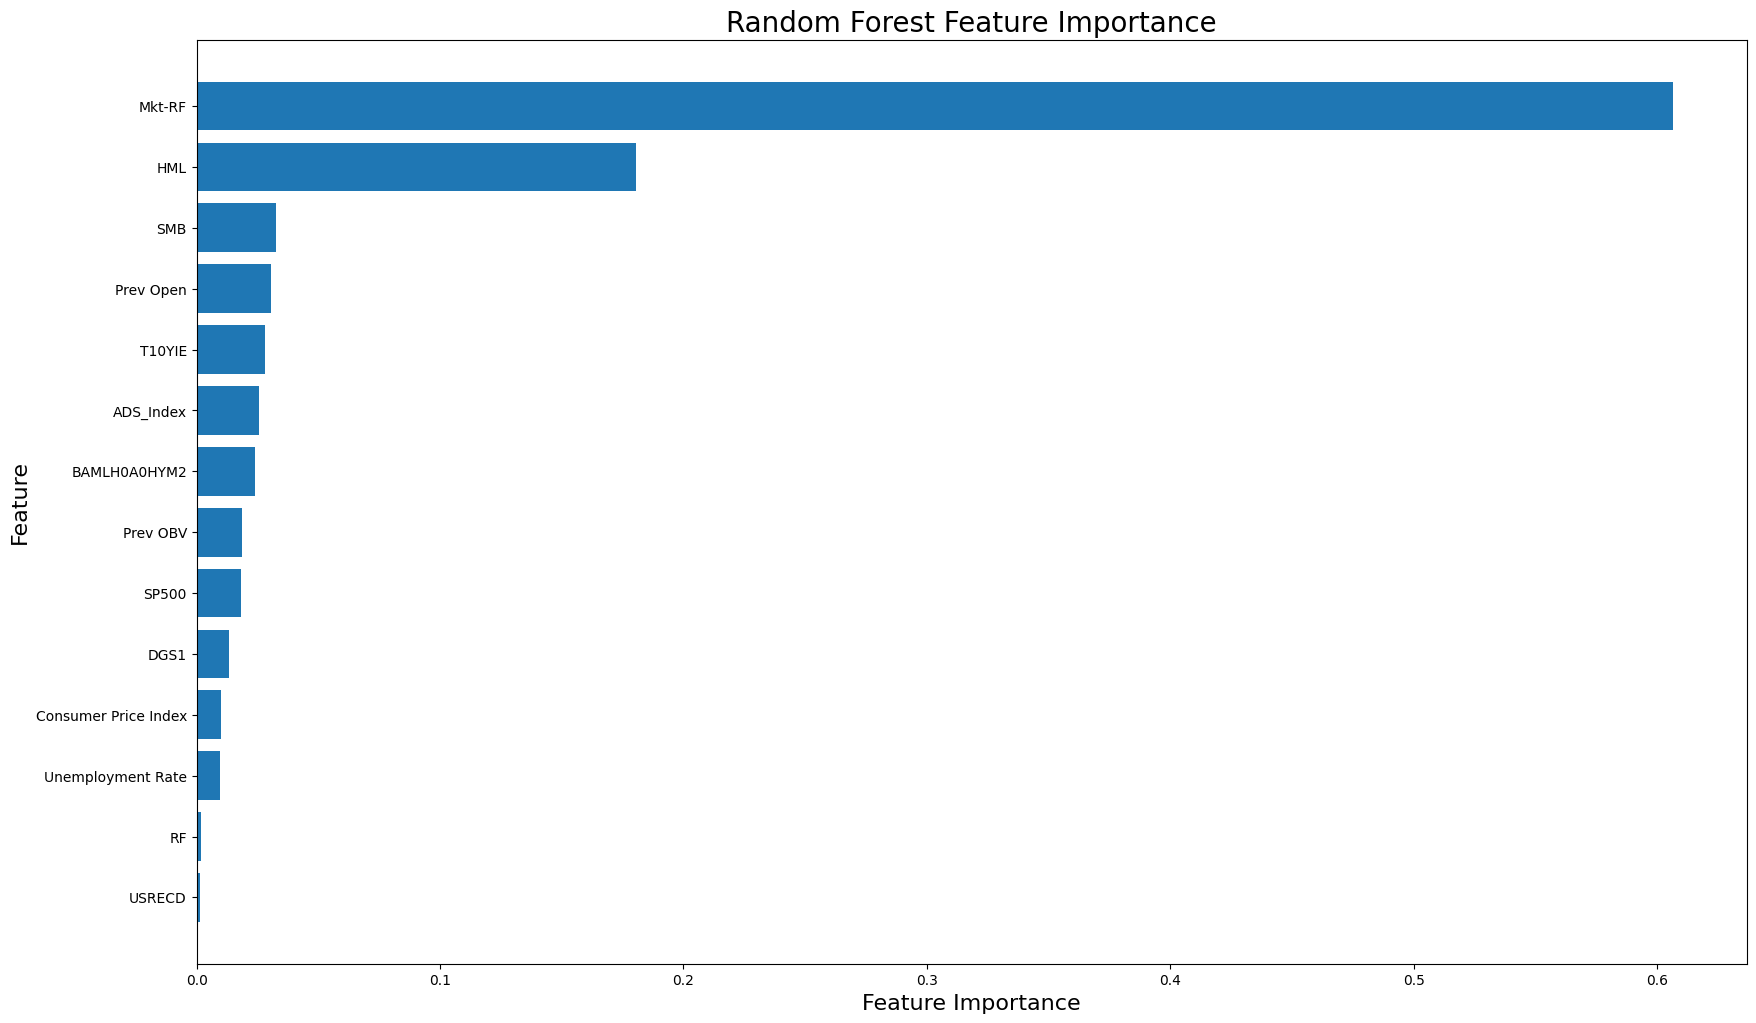

In [162]:
plt.rcParams['figure.figsize'] = (20,12)
importances = rf_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.barh(range(X_train.shape[1]), importances[sorted_idx][::-1], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx][::-1])
plt.title('Random Forest Feature Importance', fontsize=20)
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Feature' ,fontsize=16)
plt.show()

In [163]:
from sklearn.metrics import mean_squared_error as MSE
# make predictions for test data
y_pred = rf_model.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.012123


In [164]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

,y_pred,y_test
0,0.003878,-0.013034
1,-0.010747,-0.013034
2,-0.011677,-0.024055
3,-0.000452,-0.006694
4,-0.000877,0.022785
...,...,...
223,-0.001438,0.007316
224,-0.007119,0.000852
225,-0.002498,0.004607
226,-0.017715,-0.038712


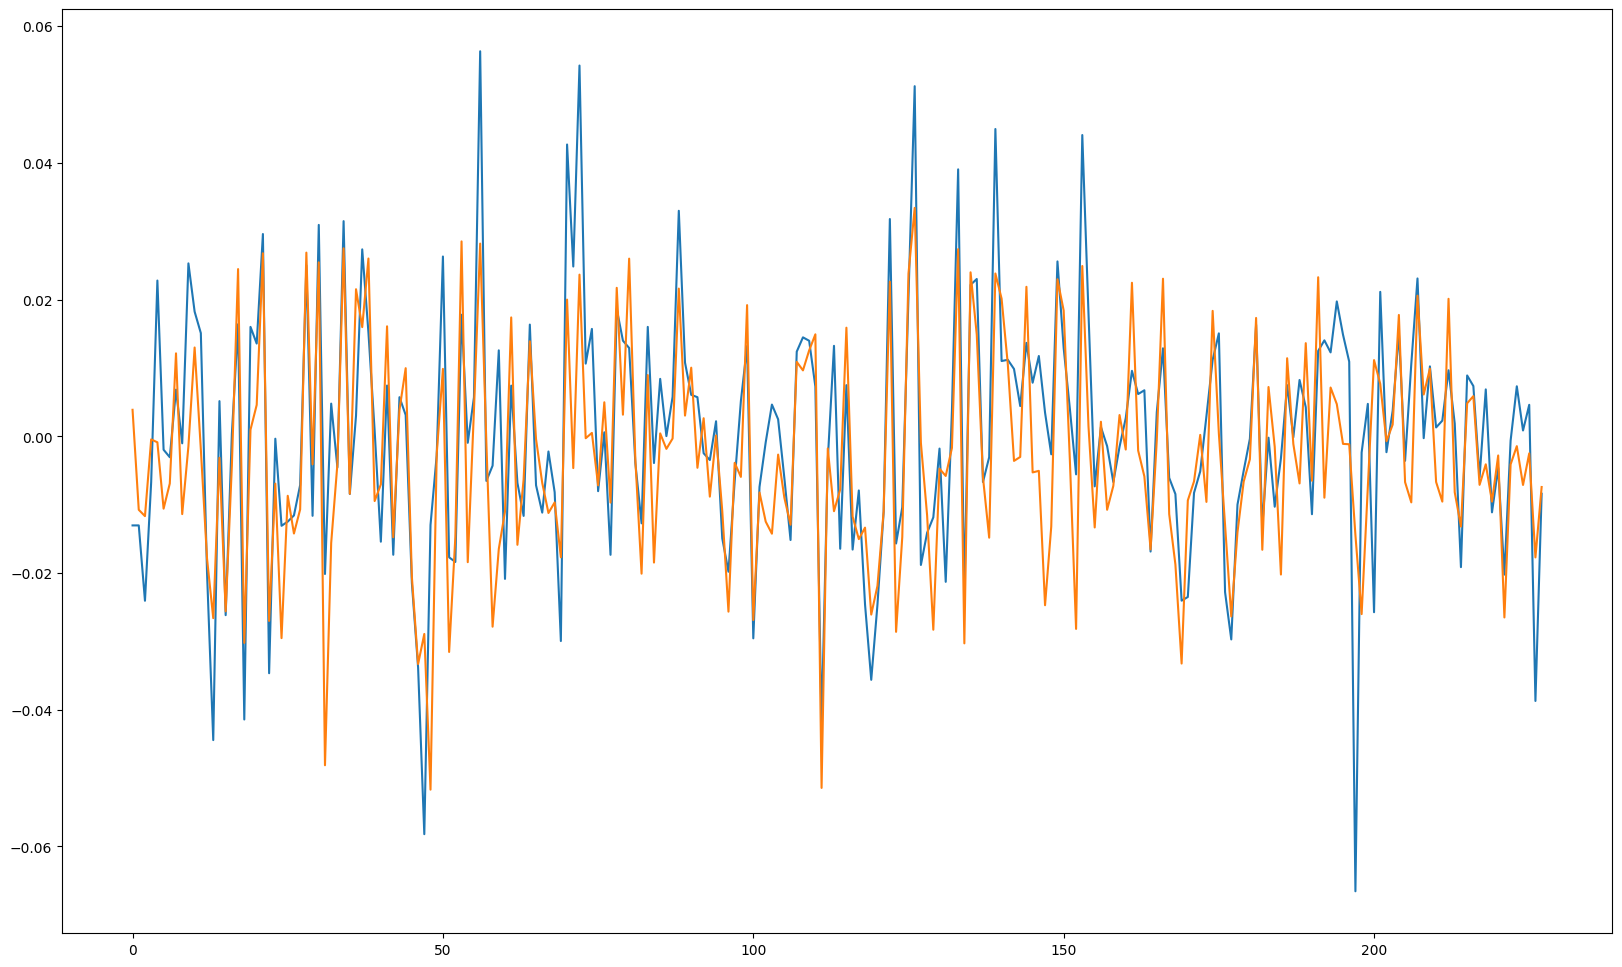

In [165]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

##XGBoost

In [166]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

# Set up our search grid
param_grid = {"max_depth": [5, 10],
              "n_estimators": [10, 50, 100],
              "learning_rate": [0.15, 0.3]}

# Create an XGBRegressor model
xgb_model = xgb.XGBRegressor(eval_metric='rmse')

# Perform grid search with cross-validation
search = GridSearchCV(xgb_model, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ", search.best_params_)

# Create a new XGBRegressor model with the best hyperparameters
xgb_model = xgb.XGBRegressor(learning_rate=search.best_params_["learning_rate"],
                             n_estimators=search.best_params_["n_estimators"],
                             max_depth=search.best_params_["max_depth"])

# Fit the model to the training data
xgb_model.fit(X_train, y_train)


The best hyperparameters are  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [167]:
from sklearn.metrics import mean_squared_error as MSE
# make predictions for test data
y_pred = xgb_model.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.013062


In [168]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

,y_pred,y_test
0,0.000761,-0.013034
1,-0.015243,-0.013034
2,-0.016905,-0.024055
3,0.006725,-0.006694
4,-0.008295,0.022785
...,...,...
223,-0.004878,0.007316
224,-0.012824,0.000852
225,-0.003950,0.004607
226,-0.013460,-0.038712


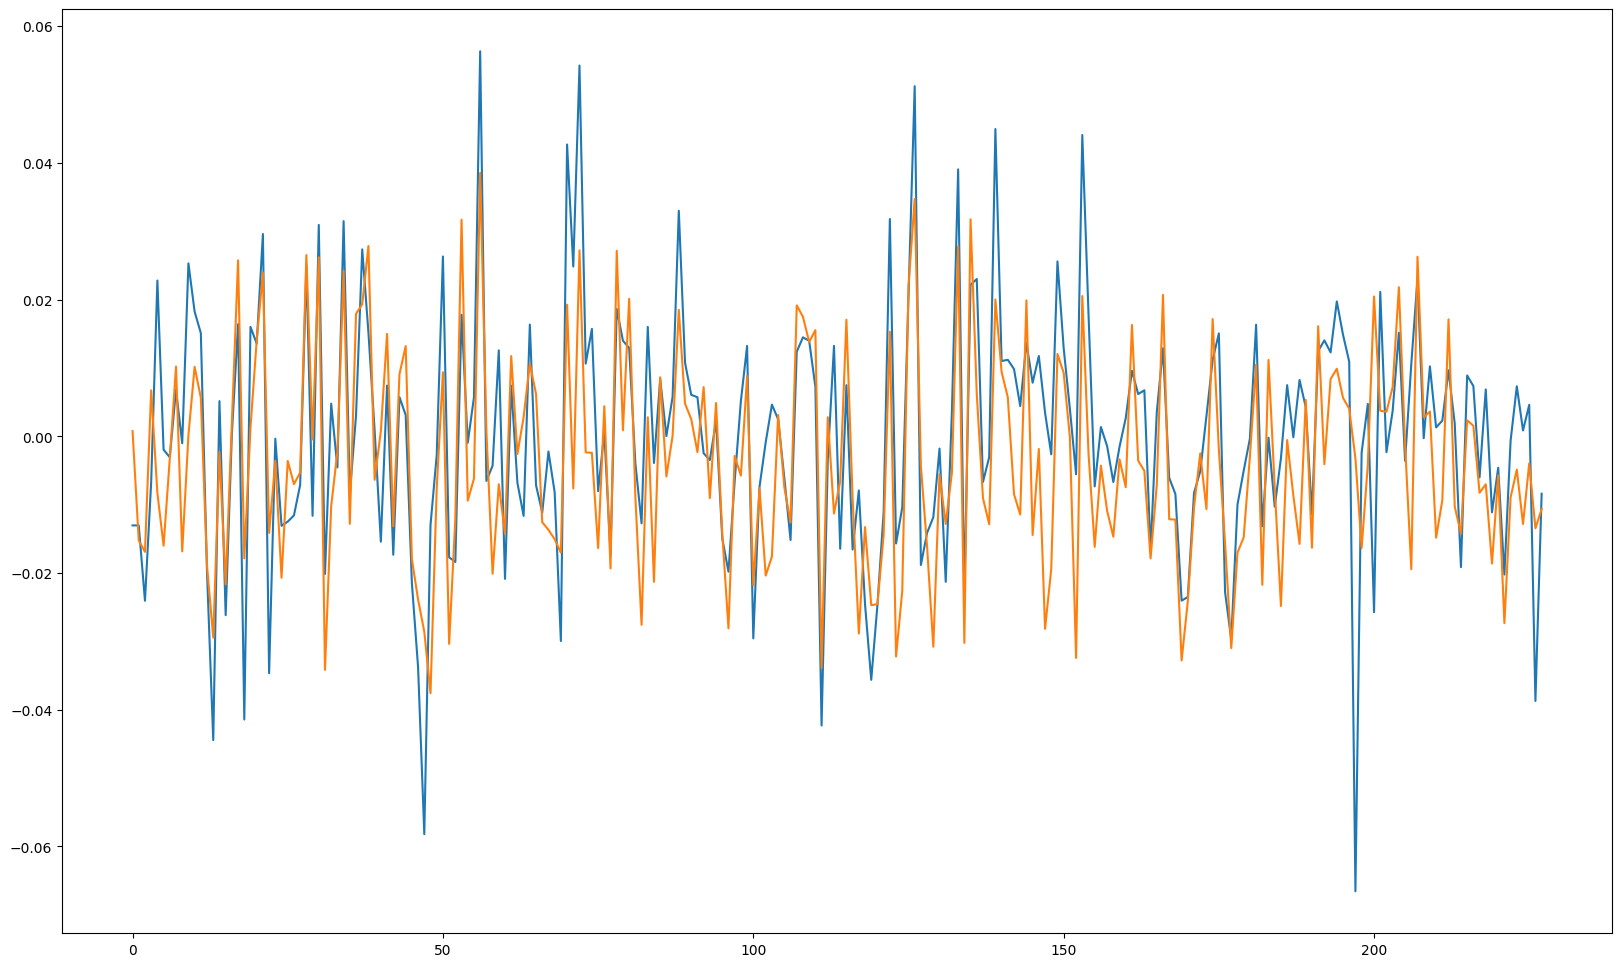

In [169]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

##Ridge Regression

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [173]:
pipeline = Pipeline([('scaler',StandardScaler()),('model',Ridge())])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(0.01,1,0.1)},cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 2/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 3/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 4/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 5/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 2/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 3/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 4/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 5/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 1/5] END .model__alpha=0.21000000000000002;, score=-0.000 total time=   0.0s
[CV 2/5] END .model__alpha=0.21000000000000002;,

{'model__alpha': 0.91}

In [174]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

array([0.00138009, 0.0017739 , 0.00022559, 0.00146478, 0.01632772,
       0.00016114, 0.00887947, 0.00062638, 0.00165473, 0.00161219,
       0.00062972, 0.00121756, 0.00225407, 0.00127696])

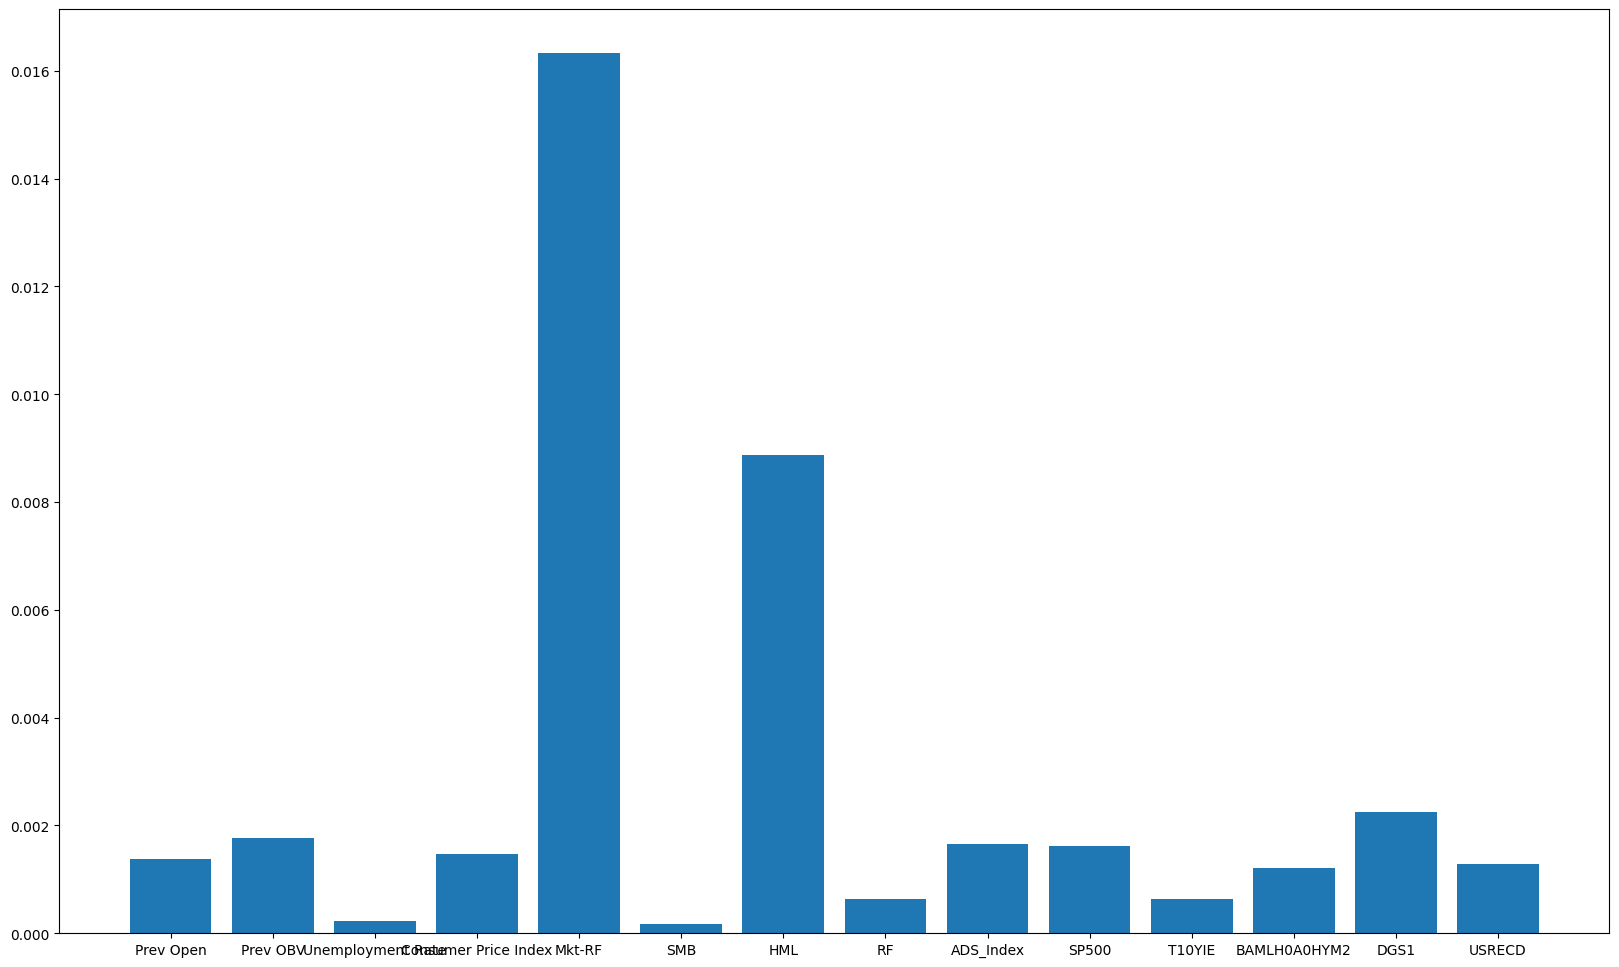

In [177]:
plt.bar(['Prev Open' ,'Prev OBV' ,'Unemployment Rate' ,'Consumer Price Index', 'Mkt-RF', 'SMB' ,'HML', 'RF', 'ADS_Index' ,'SP500' ,'T10YIE' ,'BAMLH0A0HYM2' ,'DGS1' ,'USRECD'], importance)
plt.show()

In [178]:
# Factor Selection using Ridge Regression
a=0.01
model2_prep = linear_model.Ridge(alpha=a).fit(X_train, y_train)
model2_select = X_train.columns[np.abs(model2_prep.coef_)>=0.001]
x = X_train[model2_select]
model2 = sm.OLS(y_train,x).fit()
print(model2.summary())
y_pred_model2 = model2.predict(x)
corr_model2 = ss.pearsonr(y_pred_model2, y_train)[0]
print('model 2 Ridge Regression: corr (Y, Y_pred) = '+str(corr_model2))
print('Ridge Regression selected ' +str(len(model2_select)) +' features: ', model2_select.values)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              399.5
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                   2.22e-238
Time:                        00:42:22   Log-Likelihood:                          2506.5
No. Observations:                 818   AIC:                                     -5001.
Df Residuals:                     812   BIC:                                     -4973.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [187]:

# Factor Selection using LASSO

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.0001,0.01,0.0001)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)

search.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END ................................model__alpha=0.0001; total time=   0.0s
[CV] END ................................model__alpha=0.0001; total time=   0.0s
[CV] END ................................model__alpha=0.0001; total time=   0.0s
[CV] END ................................model__alpha=0.0001; total time=   0.0s
[CV] END ................................model__alpha=0.0001; total time=   0.0s
[CV] END ................................model__alpha=0.0002; total time=   0.0s
[CV] END ................................model__alpha=0.0002; total time=   0.0s
[CV] END ................................model__alpha=0.0002; total time=   0.0s
[CV] END ................................model__alpha=0.0002; total time=   0.0s
[CV] END ................................model__alpha=0.0002; total time=   0.0s
[CV] END ................model__alpha=0.00030000000000000003; total time=   0.0s
[CV] END ................model__alpha=0.0003000

{'model__alpha': 0.0007000000000000001}

In [188]:
#Out of range, might have to OMIT
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.55423457e-05,
       1.59157474e-02, 0.00000000e+00, 8.28438125e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

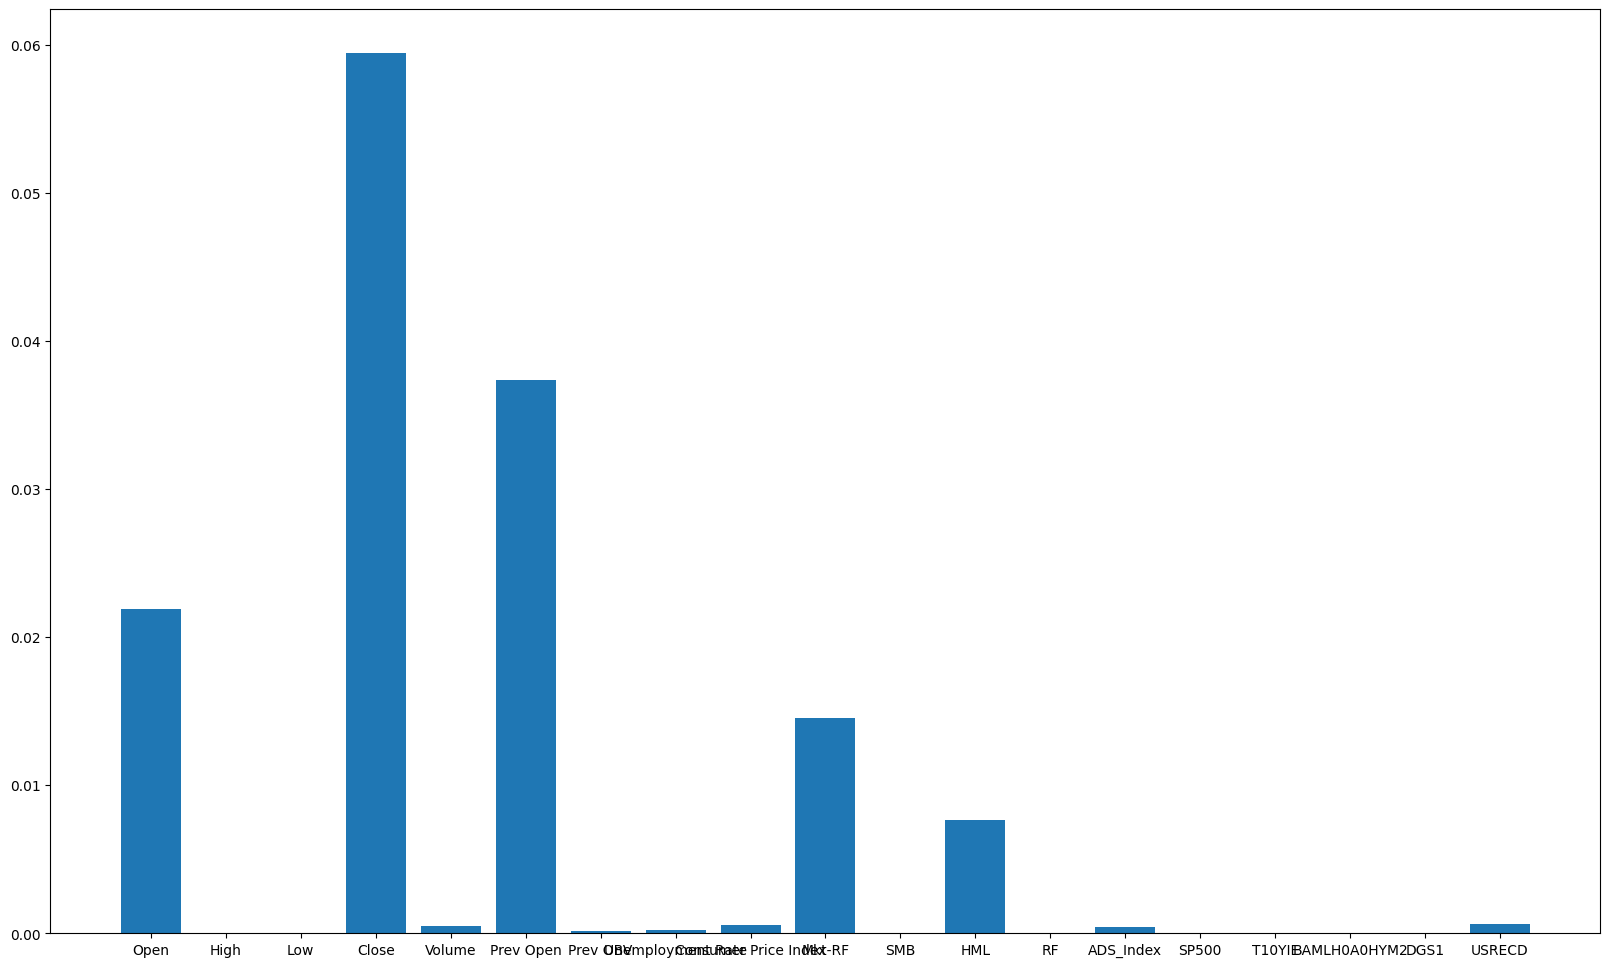

In [139]:
plt.bar(['Open', 'High', 'Low' ,'Close', 'Volume' ,'Prev Open' ,'Prev OBV' ,'Unemployment Rate' ,'Consumer Price Index', 'Mkt-RF', 'SMB' ,'HML', 'RF', 'ADS_Index' ,'SP500' ,'T10YIE' ,'BAMLH0A0HYM2' ,'DGS1' ,'USRECD'], importance)
plt.show()

In [189]:
a = 0.0004
model3_prep = linear_model.Lasso(alpha=a).fit(X_train, y_train)
model3_select = X_train.columns[np.abs(model3_prep.coef_)>=0.001]
x = X_train[model3_select]
model3 = sm.OLS(y_train,x).fit()
print(model3.summary())
y_pred_model3 = model3.predict(x)
corr_model3 = ss.pearsonr(y_pred_model3, y_train)[0]
print('model 3 LASSO: corr (Y, Y_pred) = '+str(corr_model3))
print('LASSO selected ' +str(len(model3_select)) +' features: ', model3_select.values)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              1202.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                   5.40e-244
Time:                        00:46:54   Log-Likelihood:                          2505.9
No. Observations:                 818   AIC:                                     -5008.
Df Residuals:                     816   BIC:                                     -4998.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 4. Proposed and train 3-6 models by feeding in the features you prepared in step 2.  Compare the model performance using RMSE between the fitted Y and actual Y in testing period.

##Linear Regression

In [190]:
from sklearn.linear_model import LinearRegression as LR
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  0.01574018631577806


In [191]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

,y_pred,y_test
0,-0.005529,-0.013034
1,-0.014188,-0.013034
2,-0.009116,-0.024055
3,0.000171,-0.006694
4,0.009291,0.022785
...,...,...
223,-0.009178,0.007316
224,-0.016407,0.000852
225,-0.011510,0.004607
226,-0.021134,-0.038712


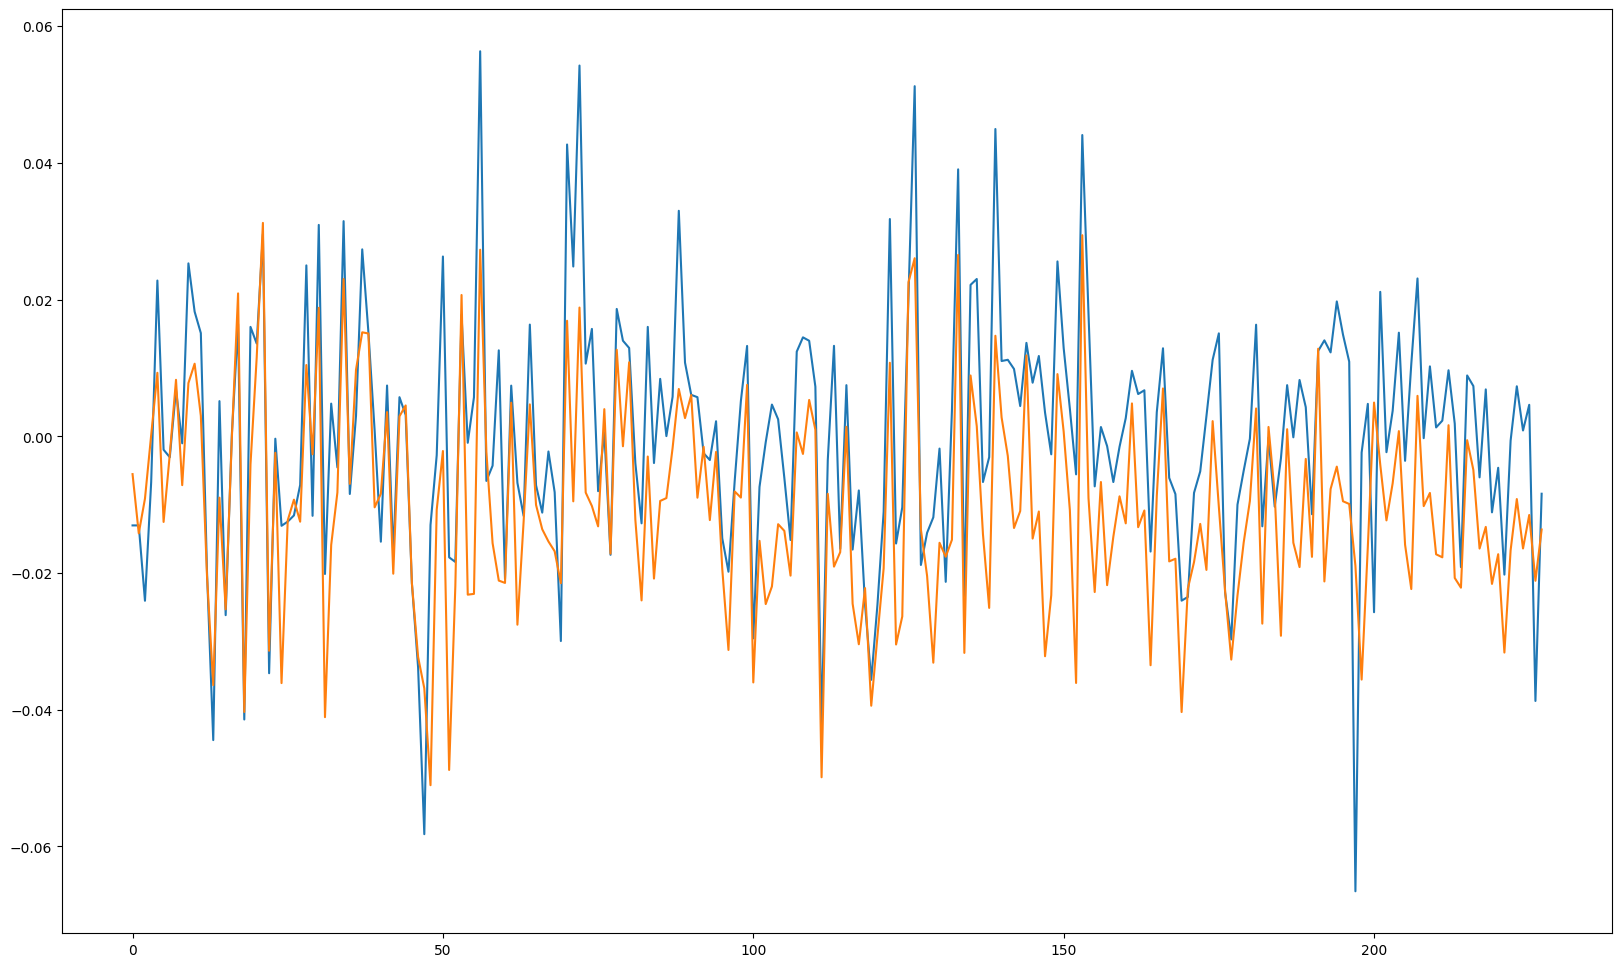

In [192]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

### GradientBoosting Regressor

In [193]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
reg2 = GBR(n_estimators=100,max_depth=5,max_features=20,random_state=0)
reg2.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = reg2.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  0.012438857969409972


In [194]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

,y_pred,y_test
0,0.001267,-0.013034
1,-0.010840,-0.013034
2,-0.009051,-0.024055
3,0.013128,-0.006694
4,0.008642,0.022785
...,...,...
223,-0.002056,0.007316
224,-0.000881,0.000852
225,-0.002156,0.004607
226,-0.012967,-0.038712


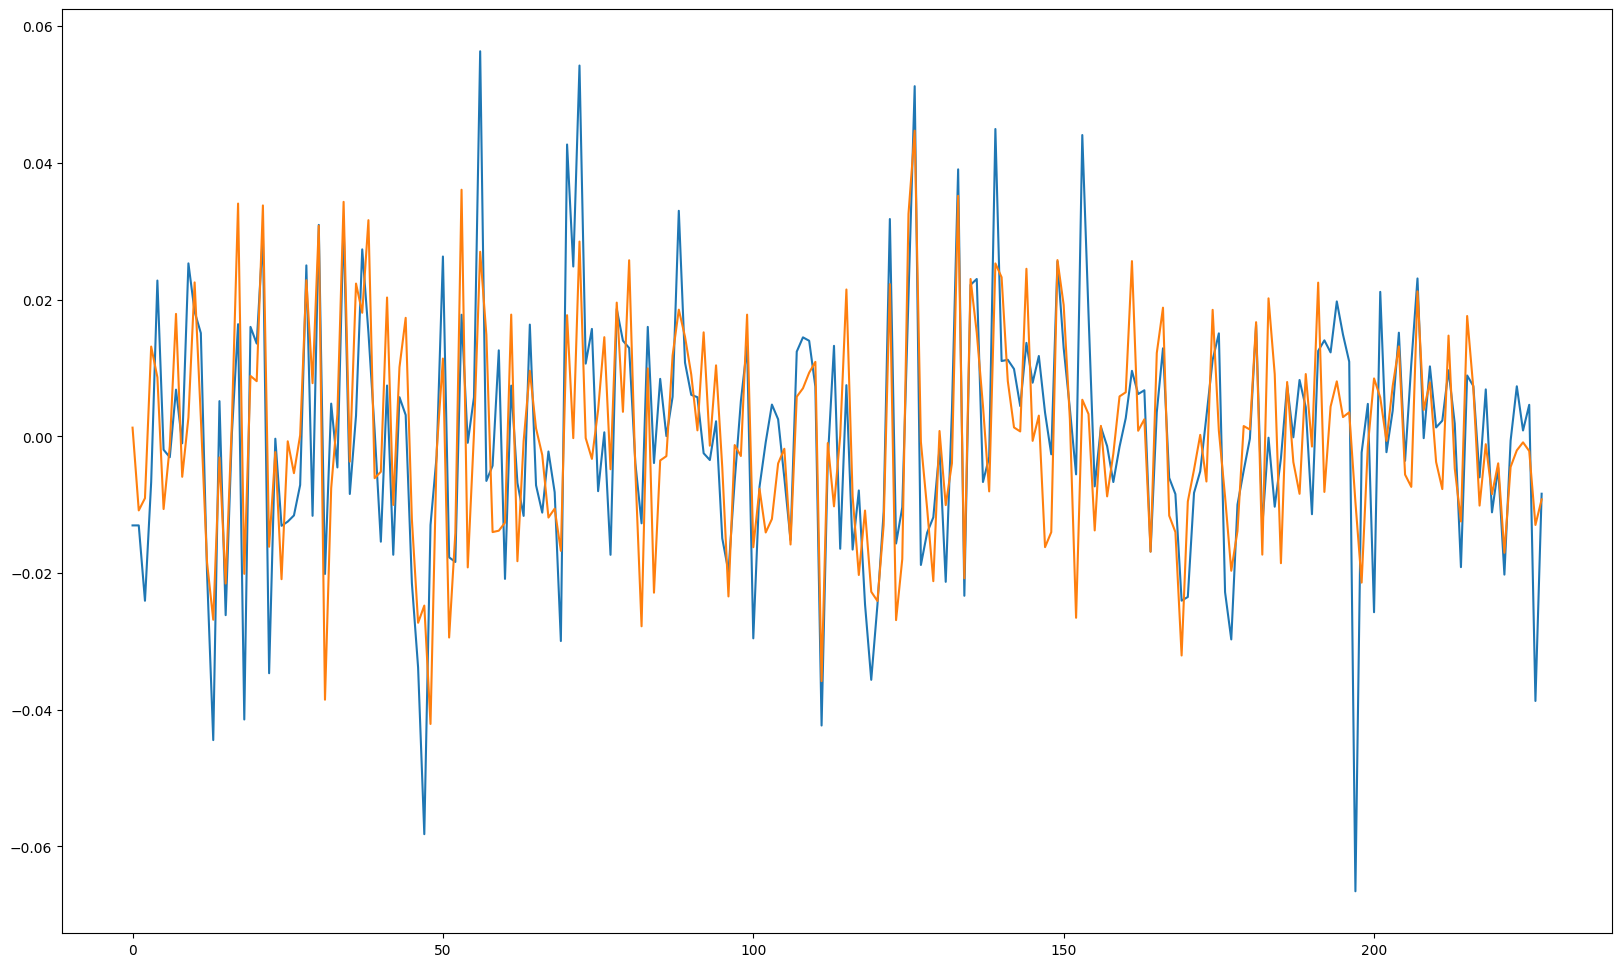

In [195]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

##5. Benchmark study of GS using Kalman Filter

In [1]:
!pip install pandas_datareader
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt
from datetime import datetime
import datetime
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from math import sqrt


# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web


In [4]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2023, 1, 1)
import yfinance as yf

df_gs = yf.download('GS', start = start, end = end)
gs= df_gs
gs=gs.reset_index()
gs['Date'] = pd.to_datetime(gs['Date'])

gs

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,257.769989,257.910004,253.919998,255.669998,227.656509,2258300
1,2018-01-03,255.479996,256.140015,253.220001,253.289993,225.537231,2988200
2,2018-01-04,255.229996,259.720001,254.320007,256.829987,228.689392,2583200
3,2018-01-05,257.179993,257.489990,253.690002,255.520004,227.522934,2594700
4,2018-01-08,254.750000,255.179993,251.619995,251.809998,224.219406,2940500
...,...,...,...,...,...,...,...
1254,2022-12-23,344.839996,347.760010,343.109985,345.510010,340.461273,1062000
1255,2022-12-27,346.510010,347.750000,341.790009,341.970001,336.973022,1035000
1256,2022-12-28,340.500000,342.850006,339.299988,340.869995,335.889069,1117200
1257,2022-12-29,342.440002,344.640015,341.239990,343.429993,338.411682,1273600


In [5]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1:
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q
        else:
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])
            return Likelihood

In [6]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1:
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q
        else:

            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q


            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]
    for  t in range(S-1,0,-1):

        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])

    u_smooth = u_smooth[0:-1]
    return u_smooth

<ipython-input-13-b4501e3ff386>:8: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1


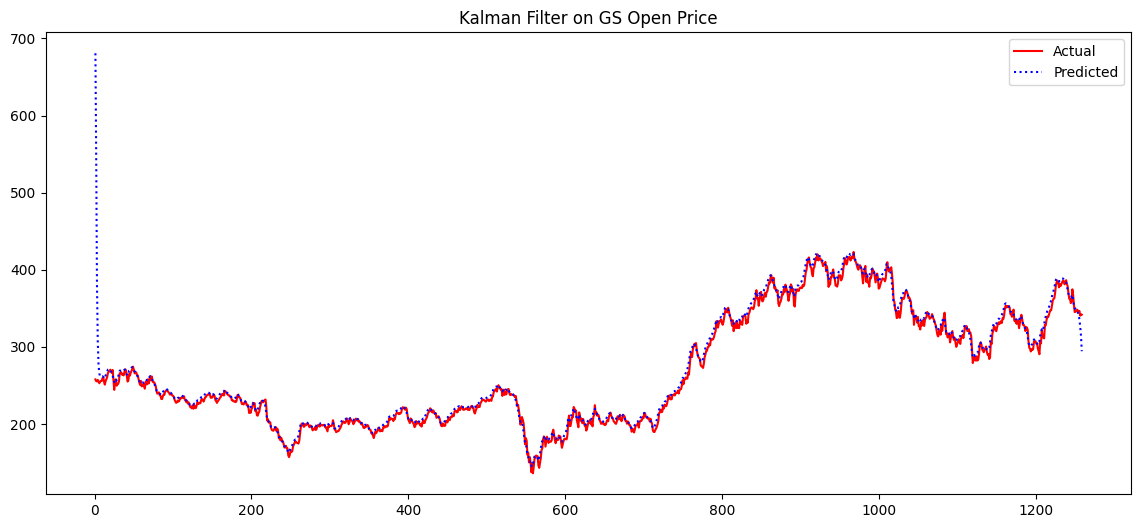

In [13]:
#Using the filter on Open Price:
Y = gs['Open']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.8, 0.95,1.6])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filter on GS Open Price")
plt.show()

<ipython-input-12-409f3f499861>:9: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1


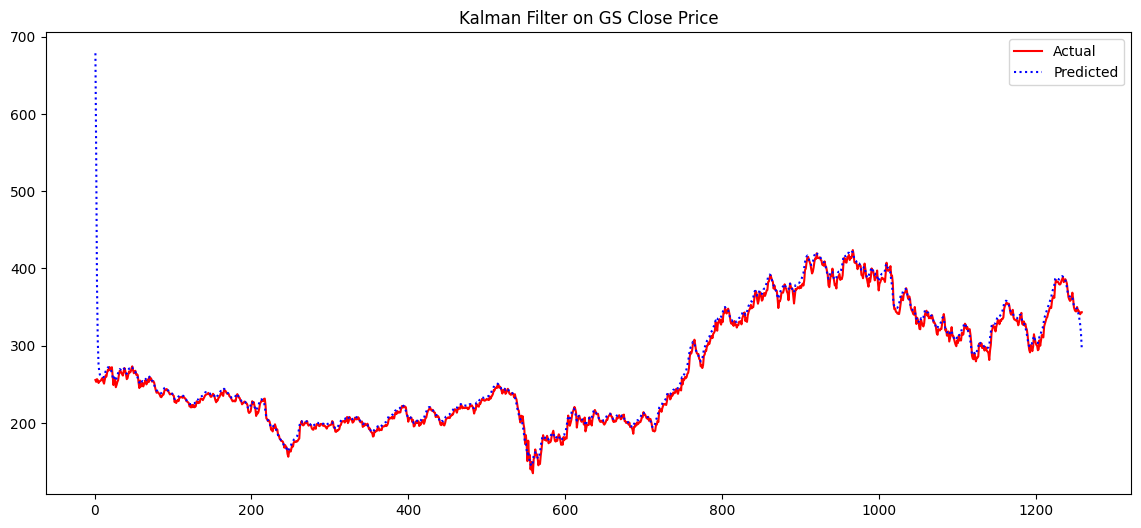

In [12]:
##Using the filter on Close Price:

Y = gs['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.8, 0.95,1.6])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filter on GS Close Price")
plt.show()

##6.1 Buy/Hold Trading rule

In [62]:

import math
from math import sqrt
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, Activation

In [63]:
start_date = datetime(2017,1,1)
end_date = datetime(2022,12,30)

In [64]:
df = yf.download('GS',start_date ,end_date)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-15,354.480011,356.109985,347.940002,349.829987,344.718140,3163700
2022-12-16,345.079987,347.779999,343.410004,346.350006,341.289001,5008800
2022-12-19,346.269989,348.399994,342.630005,344.609985,339.574432,1646700
2022-12-20,345.989990,347.420013,343.489990,344.489990,339.456177,1623000
2022-12-21,348.260010,350.880005,346.890015,350.160004,345.043365,1923100
2022-12-22,347.160004,348.049988,339.880005,345.579987,340.530243,1528900
2022-12-23,344.839996,347.760010,343.109985,345.510010,340.461304,1062000
2022-12-27,346.510010,347.750000,341.790009,341.970001,336.973022,1035000
2022-12-28,340.500000,342.850006,339.299988,340.869995,335.889069,1117200


In [65]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [66]:
train_data = scaled_data[0:training_data_len, :]
X_train=[]
y_train = []

for i in range(120,len(train_data)):
    X_train.append(train_data[i-120:i,0])
    y_train.append(train_data[i,0])

In [67]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Activation('linear'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 120, 50)           10400     
                                                                 
 lstm_9 (LSTM)               (None, 25)                7600      
                                                                 
 activation_2 (Activation)   (None, 25)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1088/1088 [==============================] - 69s 61ms/step - loss: 0.0028
Epoch 2/10
1088/1088 [==============================] - 65s 60ms/step - loss: 0.0011
Epoch 3/10
1088/1088 [==============================] - 66s 60ms/step - loss: 8.1448e-04
Epoch 4/10
1088/1088 [==============================] - 65s 60ms/step - loss: 6.8099e-04
Epoch 5/10
1088/1088 [==============================] - 65s 59ms/step - loss: 5.2818e-04
Epoch 6/10
1088/1088 [==============================] - 64s 59ms/step - loss: 4.8593e-04
Epoch 7/10
1088/1088 [==============================] - 64s 59ms/step - loss: 4.2502e-04
Epoch 8/10
1088/1088 [==============================] - 65s 60ms/step - loss: 5.1551e-04
Epoch 9/10
1088/1088 [==============================] - 79s 73ms/step - loss: 3.5231e-04
Epoch 10/10
1088/1088 [==============================] - 80s 74ms/step - loss: 4.0469e-04


In [69]:
test_data = scaled_data[training_data_len-120:, :]

In [70]:
X_test = []
y_test =  dataset[training_data_len:, :]
for i in range(120,len(test_data)):
    X_test.append(test_data[i-120:i, 0])

In [71]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [72]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 34ms/step


In [74]:
rmse = np.sqrt(np.mean((predictions - y_test)**2))
mse = mean_squared_error(predictions,y_test)
rmse_new = sqrt(mse)
r = r2_score(predictions,y_test)

In [75]:
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r))

RMSE = 6.264461090133814
R-Squared Score = 0.9664762715126657


In [76]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-76-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


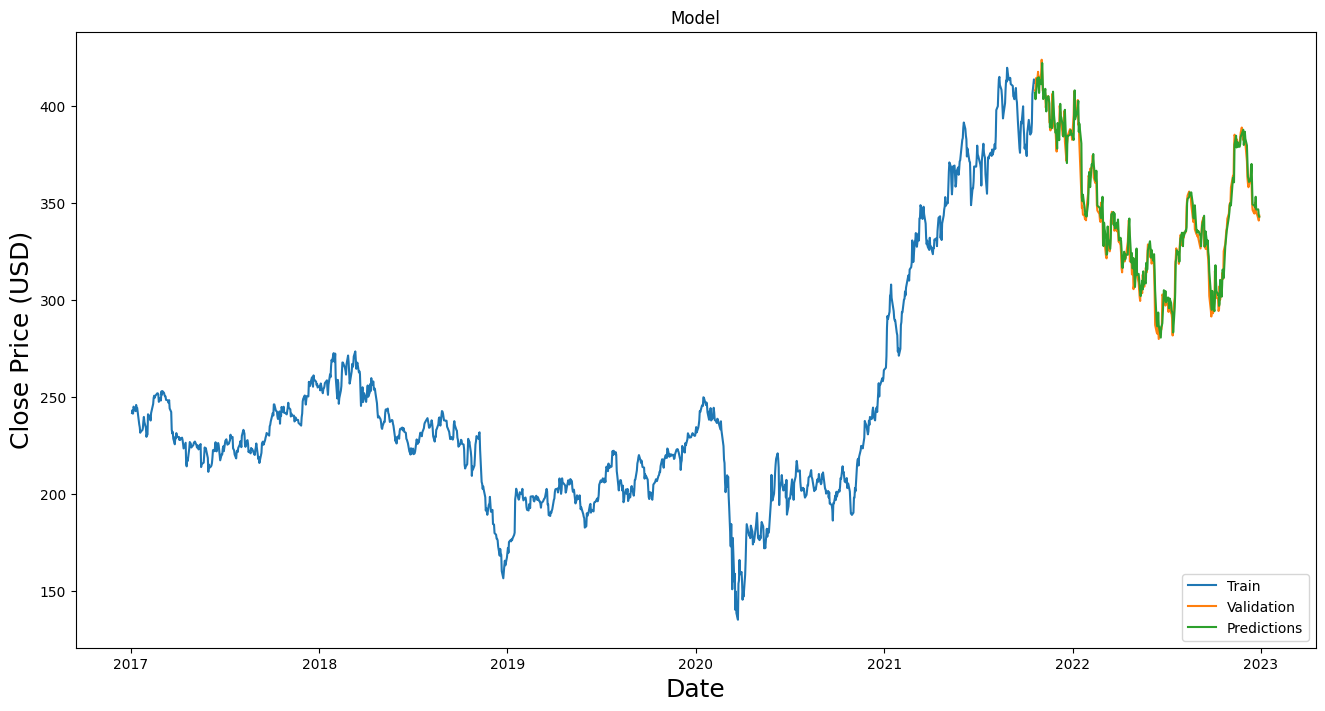

In [77]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [78]:
valid

,Close,Predictions
Date,,
2021-10-20,407.890015,406.739349
2021-10-21,407.589996,403.484192
2021-10-22,414.320007,406.004242
2021-10-25,414.750000,414.352386
2021-10-26,417.609985,412.211670
...,...,...
2022-12-22,345.579987,353.159424
2022-12-23,345.510010,346.546509
2022-12-27,341.970001,346.664368


In [79]:
final_results = valid.rename(columns={"Close":"actual_price","Predictions":"predicted_price"})

In [80]:
final_results

,actual_price,predicted_price
Date,,
2021-10-20,407.890015,406.739349
2021-10-21,407.589996,403.484192
2021-10-22,414.320007,406.004242
2021-10-25,414.750000,414.352386
2021-10-26,417.609985,412.211670
...,...,...
2022-12-22,345.579987,353.159424
2022-12-23,345.510010,346.546509
2022-12-27,341.970001,346.664368


In [87]:
def trading(df,amount):
    trade_signal = 0
    amount_arr = []
    balance = 0
    trade_action = []
    portfolio_amt = 0
    portfolio = []
    stocks = 0
    stocks_arr = []
    for i in range(len(df)-1):
        if df['predicted_price'][i+1] > df['actual_price'][i]:
            if trade_signal == 0:
                trade_action.append('BUY')
                stocks = (amount/df['actual_price'][i])
                balance = (amount%df['actual_price'][i])
                portfolio_amt = stocks * df['actual_price'][i]
                trade_signal=1
                amount = portfolio_amt
                print('Actual Stock Price:', df['actual_price'][i],'| Action:',trade_action[i],'| Portfolio Amount:',
                     portfolio_amt,'| Count:', stocks,'| Balance Amount:',balance,'| Total Amount:',amount)
                portfolio.append(portfolio_amt)
                amount_arr.append(amount)
                stocks_arr.append(stocks)
            else:
                trade_action.append('BOUGHT-HOLDING')
                portfolio_amt = stocks * df['actual_price'][i]
                amount = portfolio_amt
                print('Actual Stock Price:', df['actual_price'][i],'| Action:',trade_action[i],'| Portfolio Amount:',
                     portfolio_amt,'| Count:', stocks,'| Balance Amount:',balance,'| Total Amount:',amount)
                portfolio.append(portfolio_amt)
                amount_arr.append(amount)
                stocks_arr.append(stocks)
        elif df['predicted_price'][i+1] < df['actual_price'][i]:
            if trade_signal == 1:
                trade_action.append('SELL')
                portfolio_amt = stocks * df['actual_price'][i]
                trade_signal=0
                stocks=0
                amount = portfolio_amt
                portfolio_amt = 0
                balance = 0
                print('Actual Stock Price:', df['actual_price'][i],'| Action:',trade_action[i],'| Portfolio Amount:',
                     portfolio_amt,'| Count:', stocks,'| Balance Amount:',balance,'| Total Amount:',amount)
                portfolio.append(portfolio_amt)
                amount_arr.append(amount)
                stocks_arr.append(stocks)
            else:
                trade_action.append('PREDICTED PRICE IS LOW')
                print('Actual Stock Price:', df['actual_price'][i],'| Action:',trade_action[i],'| Portfolio Amount:',
                     portfolio_amt,'| Count:', stocks,'| Balance Amount:',balance,'| Total Amount:',amount)
                portfolio.append(portfolio_amt)
                amount_arr.append(amount)
                stocks_arr.append(stocks)
        print('\n ------------------------------------------------------------------------------------------')
    return amount_arr

In [88]:
invst_amt = 100000
amt = trading(final_results,invst_amt)

Actual Stock Price: 407.8900146484375 | Action: PREDICTED PRICE IS LOW | Portfolio Amount: 0 | Count: 0 | Balance Amount: 0 | Total Amount: 100000

 ------------------------------------------------------------------------------------------
Actual Stock Price: 407.5899963378906 | Action: PREDICTED PRICE IS LOW | Portfolio Amount: 0 | Count: 0 | Balance Amount: 0 | Total Amount: 100000

 ------------------------------------------------------------------------------------------
Actual Stock Price: 414.32000732421875 | Action: BUY | Portfolio Amount: 100000.0 | Count: 241.35933151243353 | Balance Amount: 148.87823486328125 | Total Amount: 100000.0

 ------------------------------------------------------------------------------------------
Actual Stock Price: 414.75 | Action: SELL | Portfolio Amount: 0 | Count: 0 | Balance Amount: 0 | Total Amount: 100103.78274478181

 ------------------------------------------------------------------------------------------
Actual Stock Price: 417.60998535

In [89]:
pf_amt = round(sum(amt)/len(amt),2)
pf_amt



100914.55

In [90]:
pf_amt/invst_amt * 10

10.091455

##6.2 Dual Moving Avg Crossover Trading Signal

In [93]:
!pip install backtesting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173804 sha256=cfd02037e16ee32a86bb234f3985535e0307a556a578cfd9baa205b1c589b5f5
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [94]:
GS = yf.download("GS",period="5y",progress=False)
GS

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,219.750000,223.339996,218.889999,223.259995,200.060638,1723200
2018-07-03,224.460007,224.639999,219.990005,220.380005,197.479889,1204400
2018-07-05,221.500000,222.139999,219.779999,220.740005,197.802505,2218200
2018-07-06,220.539993,223.199997,219.880005,221.789993,198.743393,1846400
2018-07-09,223.360001,228.199997,223.000000,227.990005,204.299118,2743900
...,...,...,...,...,...,...
2023-06-26,315.130005,316.640015,312.170013,312.359985,312.359985,2481000
2023-06-27,312.410004,315.679993,310.559998,313.450012,313.450012,2156800
2023-06-28,311.720001,314.899994,310.690002,313.660004,313.660004,2423500


In [95]:
fig = px.line(GS, y="Adj Close", title='GS Stock Price', labels = {'Adj Close':'GS Close Price(in USD)'})
fig.show()

In [97]:
window1 = 30
sma1 = pd.DataFrame()
sma1['Adj Close'] = GS['Adj Close'].rolling(window = window1).mean()
sma1

,Adj Close
Date,
2018-07-02,NaN
2018-07-03,NaN
2018-07-05,NaN
2018-07-06,NaN
2018-07-09,NaN
...,...
2023-06-26,326.483788
2023-06-27,326.362601
2023-06-28,326.163394


In [98]:
window2 = 100
sma2 = pd.DataFrame()
sma2['Adj Close'] = GS['Adj Close'].rolling(window = window2).mean()
sma2

,Adj Close
Date,
2018-07-02,NaN
2018-07-03,NaN
2018-07-05,NaN
2018-07-06,NaN
2018-07-09,NaN
...,...
2023-06-26,333.584660
2023-06-27,333.115500
2023-06-28,332.611388


In [99]:
fig.add_scatter(x=sma1.index,y=sma1['Adj Close'], mode='lines',name='SMA'+str(window1))
fig.add_scatter(x=sma2.index,y=sma2['Adj Close'], mode='lines',name='SMA'+str(window2))
fig.show()


In [100]:
data = pd.DataFrame()
data['GS'] = GS['Adj Close']
data['SMA'+str(window1)] = sma1['Adj Close']
data['SMA'+str(window2)] = sma2['Adj Close']
data


,GS,SMA30,SMA100
Date,,,
2018-07-02,200.060638,NaN,NaN
2018-07-03,197.479889,NaN,NaN
2018-07-05,197.802505,NaN,NaN
2018-07-06,198.743393,NaN,NaN
2018-07-09,204.299118,NaN,NaN
...,...,...,...
2023-06-26,312.359985,326.483788,333.584660
2023-06-27,313.450012,326.362601,333.115500
2023-06-28,313.660004,326.163394,332.611388


In [101]:
def dualMACrossover(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1 # Flag denoting when the 2 moving averages crossed each other
    for i in range(len(data)):
        if data['SMA'+str(window1)][i] > data['SMA'+str(window2)][i]:
            if flag != 1:
                sigPriceBuy.append(data['GS'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA'+str(window1)][i] < data['SMA'+str(window2)][i]:
            if flag!=0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['GS'][i])
                flag=0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy,sigPriceSell)

In [102]:
buy_sell = dualMACrossover(data)
data['BuySignalPrice'] = buy_sell[0]
data['SellSignalPrice'] = buy_sell[1]

In [103]:
import plotly.graph_objects as go

fig = px.line(data, y="GS", title='Strategy Visualization', labels = {'index':'Date'})
fig.add_scatter(x=data.index,y=data['SMA'+str(window1)], mode='lines',name='SMA'+str(window1))
fig.add_scatter(x=data.index,y=data['SMA'+str(window2)], mode='lines',name='SMA'+str(window2))

fig.add_trace(go.Scatter(mode="markers", x=data.index, y=data.BuySignalPrice, marker_symbol='triangle-up',
                           marker_line_color="#000000", marker_color="#000000",
                           marker_line_width=2, marker_size=15, name='Buy'))

fig.add_trace(go.Scatter(mode="markers", x=data.index, y=data.SellSignalPrice, marker_symbol='triangle-down',
                           marker_line_color="#E74C3C", marker_color="#E74C3C",
                           marker_line_width=2, marker_size=15, name='Sell'))
fig.show()

In [104]:
class DualMACrossover(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, window1)
        self.ma2 = self.I(SMA, price, window2)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(GS, DualMACrossover,
              exclusive_orders=True)
stats = bt.run()

In [105]:
stats

Start                     2018-07-02 00:00:00
End                       2023-06-30 00:00:00
Duration                   1824 days 00:00:00
Exposure Time [%]                   86.804452
Equity Final [$]                  4956.498383
Equity Peak [$]                  11047.779449
Return [%]                         -50.435016
Buy & Hold Return [%]                44.46834
Return (Ann.) [%]                  -13.116347
Volatility (Ann.) [%]               26.021138
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -57.762927
Avg. Drawdown [%]                  -13.870486
Max. Drawdown Duration     1108 days 00:00:00
Avg. Drawdown Duration      158 days 00:00:00
# Trades                                   12
Win Rate [%]                        16.666667
Best Trade [%]                      80.977603
Worst Trade [%]                    -23.456588
Avg. Trade [%]                    